In [1]:
import os

PATH = '/home/stadlerm/Development/Projects/DreamChallenge/RA2_alpine_lads'

os.chdir(PATH)

In [2]:
from utils.config import Config

config = Config()

In [3]:
from model.joint_detection import create_hand_joint_detector, create_foot_joint_detector

hand_detector = create_hand_joint_detector(config)
foot_detector = create_foot_joint_detector(config)

In [4]:
from prediction.joints.joint_predictions import dream_joint_detector

joint_detector = dream_joint_detector(config, hand_detector, foot_detector)

hand_dataframe, feet_dataframe = joint_detector.create_dream_dataframes(source_file = 'training_subset.csv')

In [5]:
hand_dataframe.to_csv('test.csv')

In [5]:
print(hand_dataframe)

        coord_x      coord_y  erosion_0  erosion_1 flip image_name    key  \
0   1085.986816   781.893250          0        NaN    N  UAB001-LH    mcp   
1    766.021423   432.452911          0        NaN    N  UAB001-LH  pip_2   
2    546.786316   421.918152          0        NaN    N  UAB001-LH  pip_3   
3    363.984253   544.094055          0        NaN    N  UAB001-LH  pip_4   
4    224.541321   710.095215          0        NaN    N  UAB001-LH  pip_5   
5    972.886108   967.506836          0        NaN    N  UAB001-LH  mcp_1   
6    770.596252   707.976685          0        NaN    N  UAB001-LH  mcp_2   
7    608.761963   728.512085          0        NaN    N  UAB001-LH  mcp_3   
8    479.273071   800.949036          0        NaN    N  UAB001-LH  mcp_4   
9    370.531311   877.751404          0        NaN    N  UAB001-LH  mcp_5   
10   812.262939  1238.558960          0        0.0    N  UAB001-LH     w1   
11   622.700378  1346.451416          0        0.0    N  UAB001-LH     w2   

In [6]:
print(feet_dataframe)

       coord_x     coord_y  erosion_0 flip image_name    key  narrowing_0
0   840.322021  283.868652          1    N  UAB001-LF    mtp            0
1   865.966675  569.873352          0    N  UAB001-LF  mtp_1            1
2   676.749268  555.863342          0    N  UAB001-LF  mtp_2            0
3   553.687195  581.557800          0    N  UAB001-LF  mtp_3            0
4   442.544922  655.176758          0    N  UAB001-LF  mtp_4            0
5   296.135193  784.955139          0    N  UAB001-LF  mtp_5            0
6   284.257324  352.791473          0    Y  UAB001-RF    mtp            0
7   263.251587  597.388245          0    Y  UAB001-RF  mtp_1            2
8   453.628235  552.896545          0    Y  UAB001-RF  mtp_2            0
9   577.232056  582.475769          0    Y  UAB001-RF  mtp_3            0
10  689.294495  663.756470          0    Y  UAB001-RF  mtp_4            0
11  833.338867  781.645935          0    Y  UAB001-RF  mtp_5            2


In [3]:
from dataset.joint_dataset import joint_dataset

joint_dataset = joint_dataset(config).create_joints_dataset()

y: tf.Tensor([0.], shape=(1,), dtype=float64)


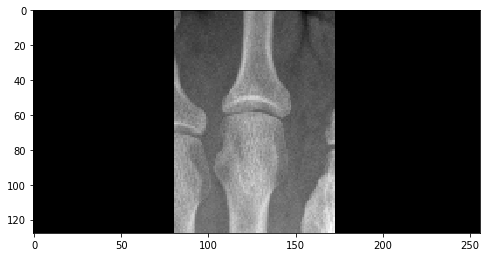

y: tf.Tensor([0.], shape=(1,), dtype=float64)


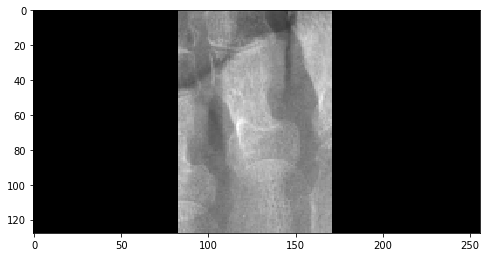

y: tf.Tensor([0.], shape=(1,), dtype=float64)


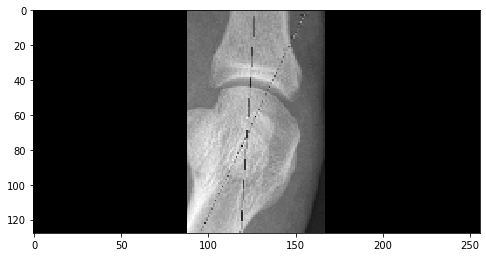

y: tf.Tensor([0.], shape=(1,), dtype=float64)


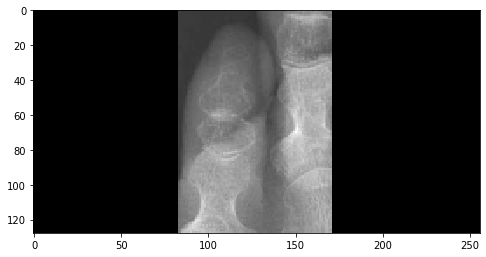

y: tf.Tensor([0.], shape=(1,), dtype=float64)


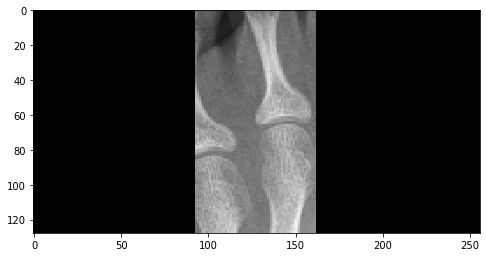

y: tf.Tensor([0.], shape=(1,), dtype=float64)


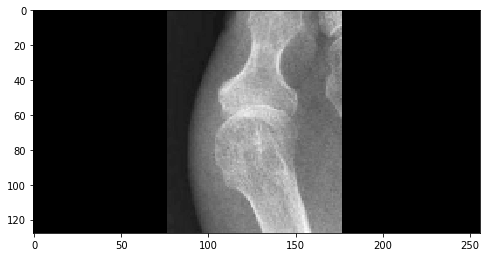

y: tf.Tensor([1.], shape=(1,), dtype=float64)


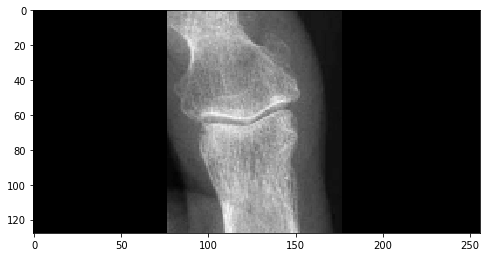

y: tf.Tensor([0.], shape=(1,), dtype=float64)


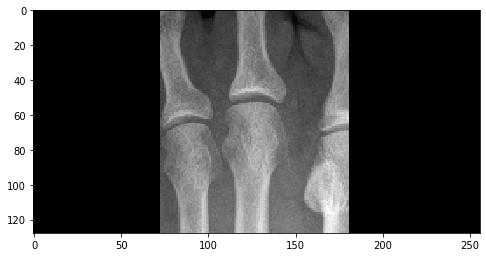

y: tf.Tensor([0.], shape=(1,), dtype=float64)


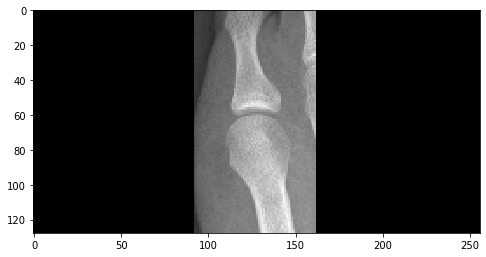

y: tf.Tensor([0.], shape=(1,), dtype=float64)


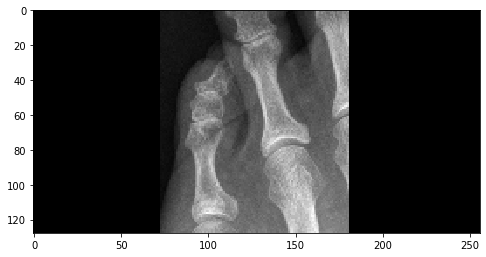

y: tf.Tensor([0.], shape=(1,), dtype=float64)


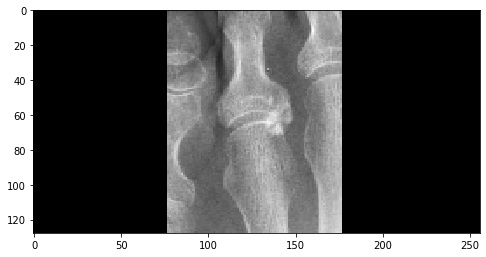

y: tf.Tensor([0.], shape=(1,), dtype=float64)


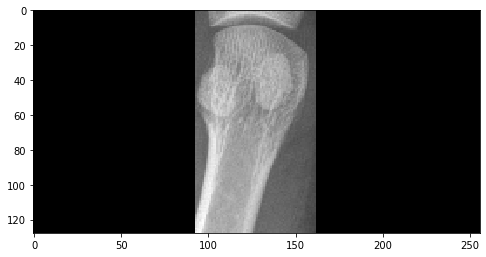

y: tf.Tensor([0.], shape=(1,), dtype=float64)


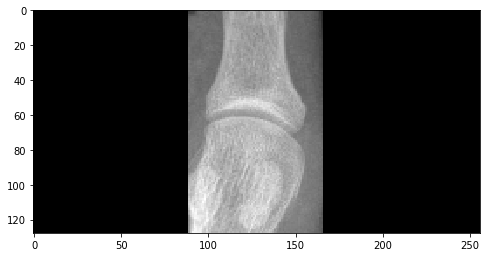

y: tf.Tensor([0.], shape=(1,), dtype=float64)


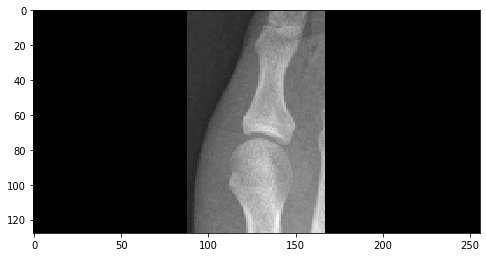

y: tf.Tensor([0.], shape=(1,), dtype=float64)


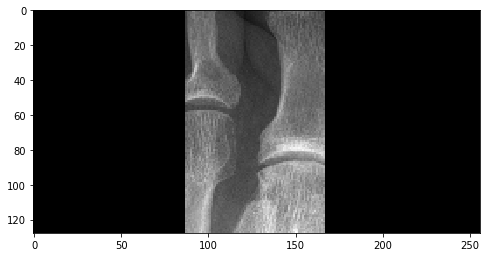

y: tf.Tensor([0.], shape=(1,), dtype=float64)


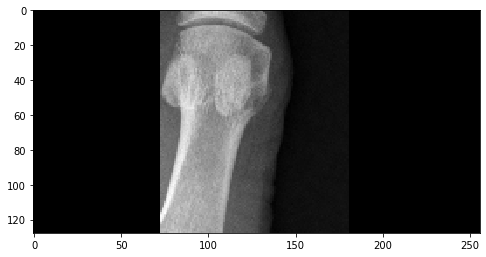

In [6]:
import matplotlib.pyplot as plt

for images, label in joint_dataset.take(1):
    for idx, image in enumerate(images):
        print('y:', label[idx])
        
        plt.figure(figsize = (8, 8))
        plt.imshow(image[:, :, 0], cmap="gray")
        # plt.scatter(label[idx][0::2], label[idx][1::2], 20, c = 'red', marker = 'x')
        plt.show()

In [10]:
import pandas as pd

thing = pd.read_csv('thing.csv')

print(thing)

    Unnamed: 0      coord_x     coord_y  erosion_0 flip image_name    key  \
0            0   840.322021  283.868652          1    N  UAB001-LF    mtp   
1            1   865.966675  569.873352          0    N  UAB001-LF  mtp_1   
2            2   676.749268  555.863342          0    N  UAB001-LF  mtp_2   
3            3   553.687195  581.557800          0    N  UAB001-LF  mtp_3   
4            4   442.544922  655.176758          0    N  UAB001-LF  mtp_4   
5            5   296.135193  784.955139          0    N  UAB001-LF  mtp_5   
6            6   284.257324  352.791473          0    Y  UAB001-RF    mtp   
7            7   263.251587  597.388245          0    Y  UAB001-RF  mtp_1   
8            8   453.628235  552.896545          0    Y  UAB001-RF  mtp_2   
9            9   577.232056  582.475769          0    Y  UAB001-RF  mtp_3   
10          10   689.294495  663.756470          0    Y  UAB001-RF  mtp_4   
11          11   833.338867  781.645935          0    Y  UAB001-RF  mtp_5   